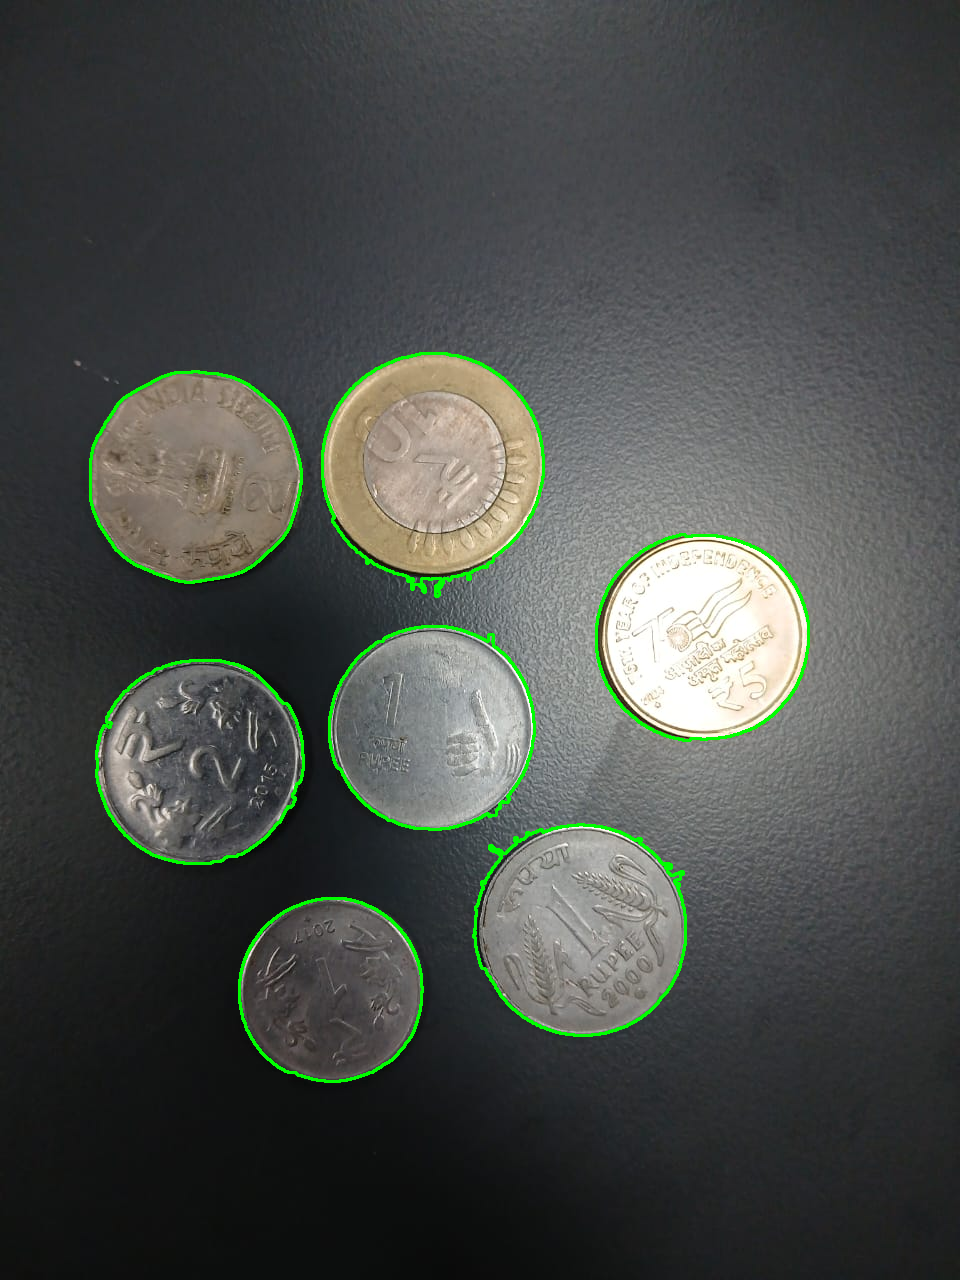

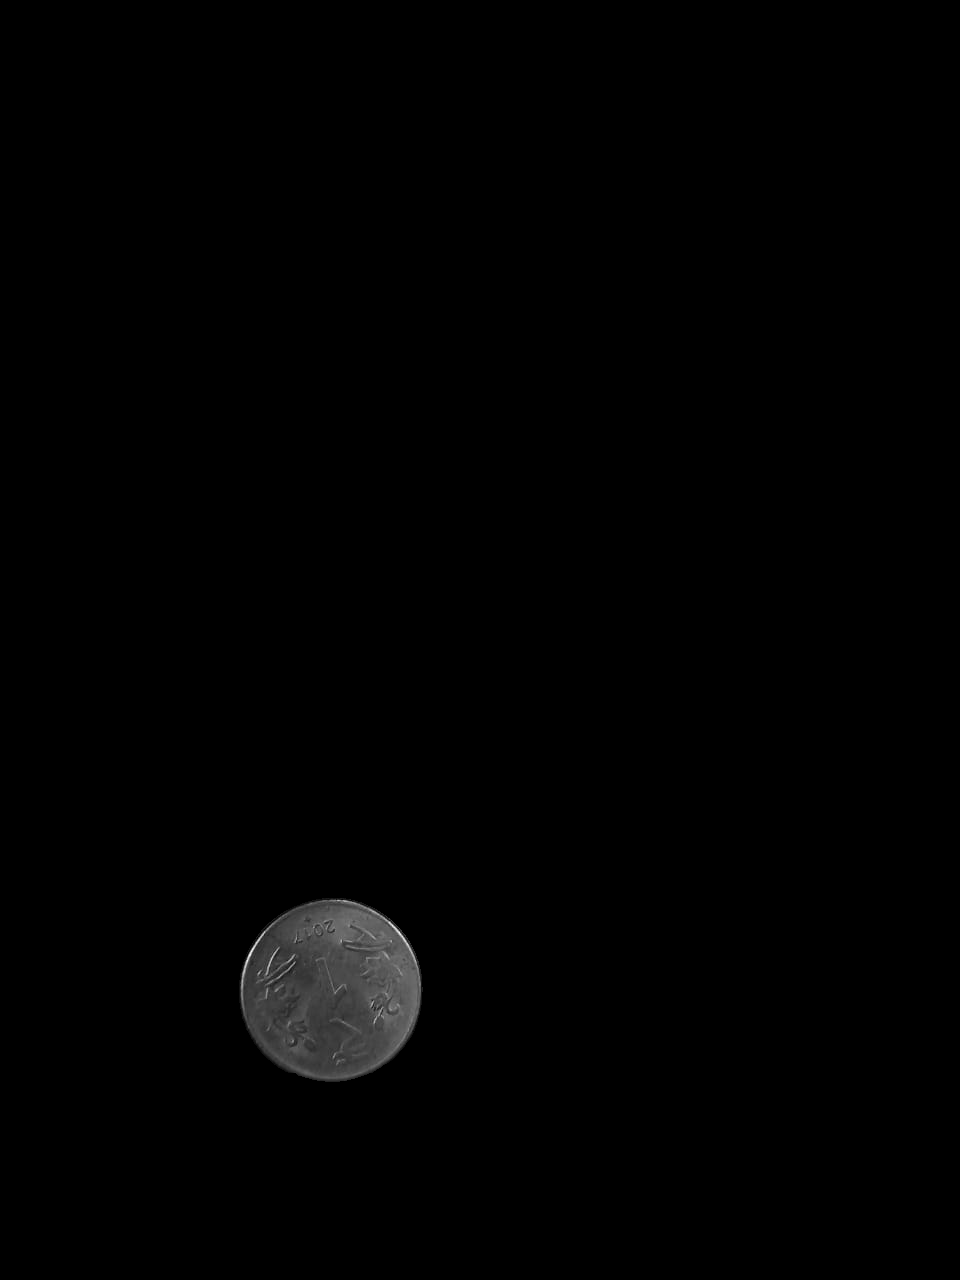

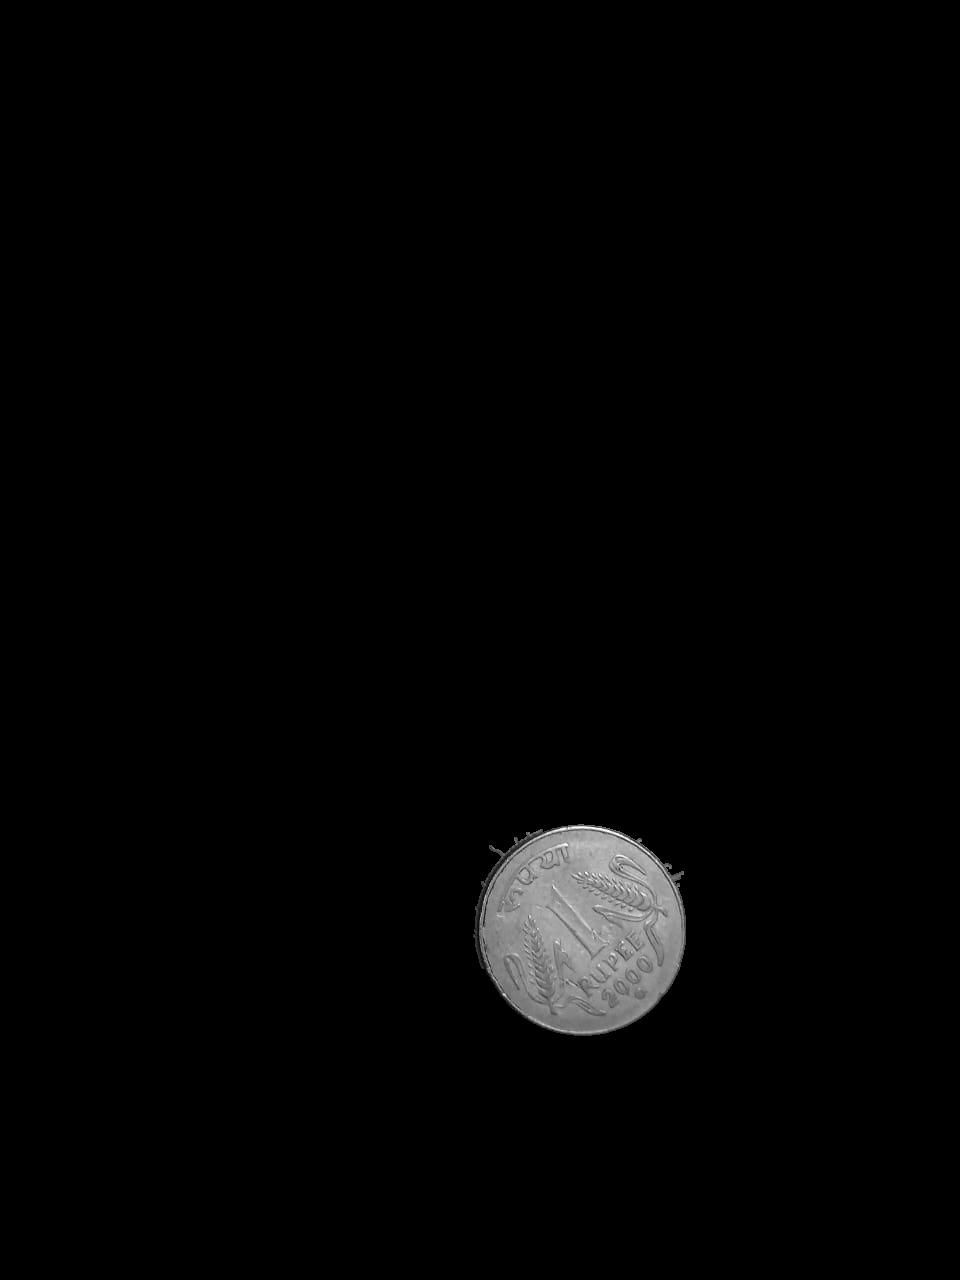

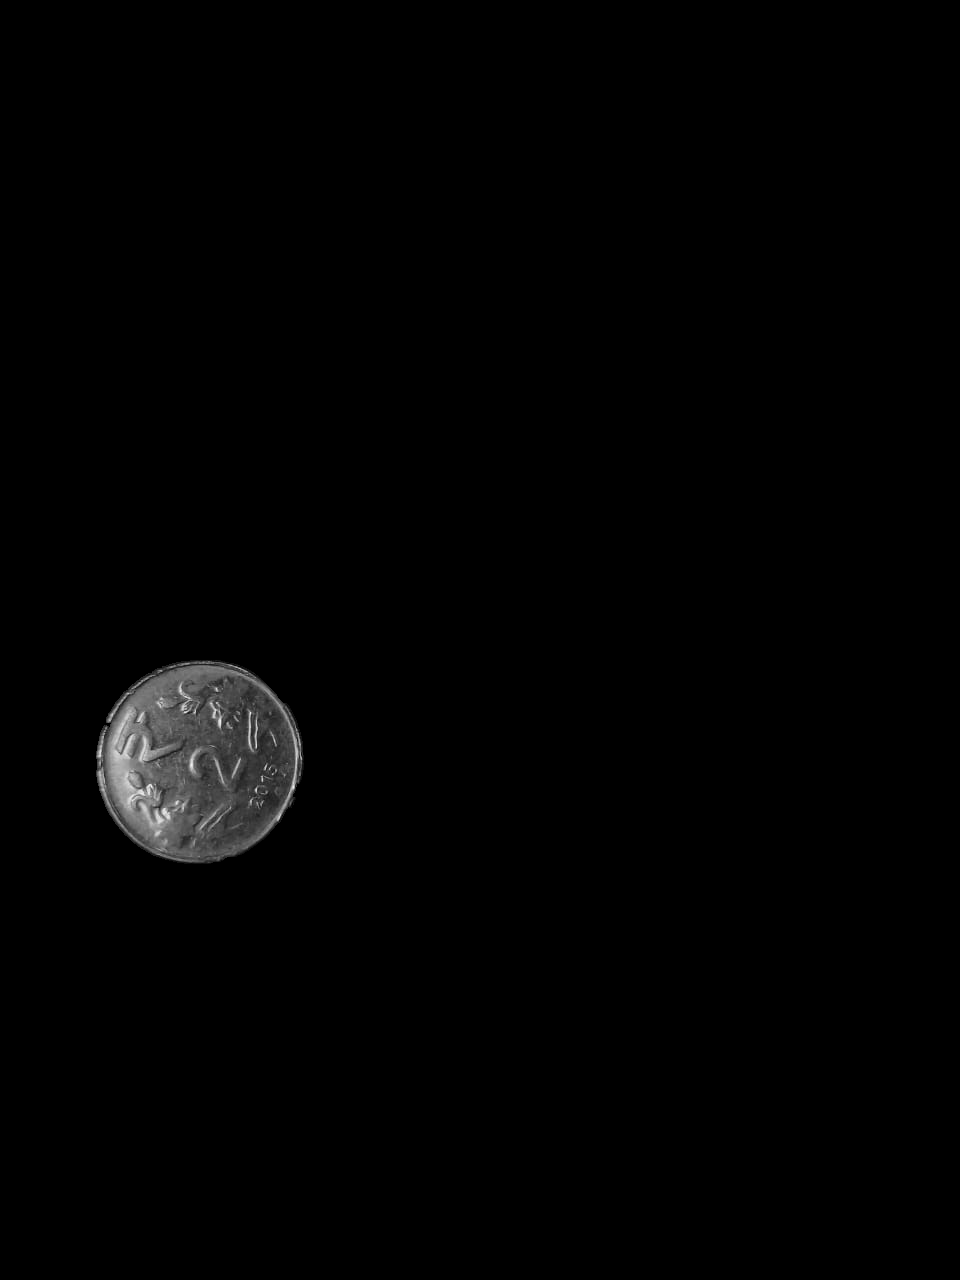

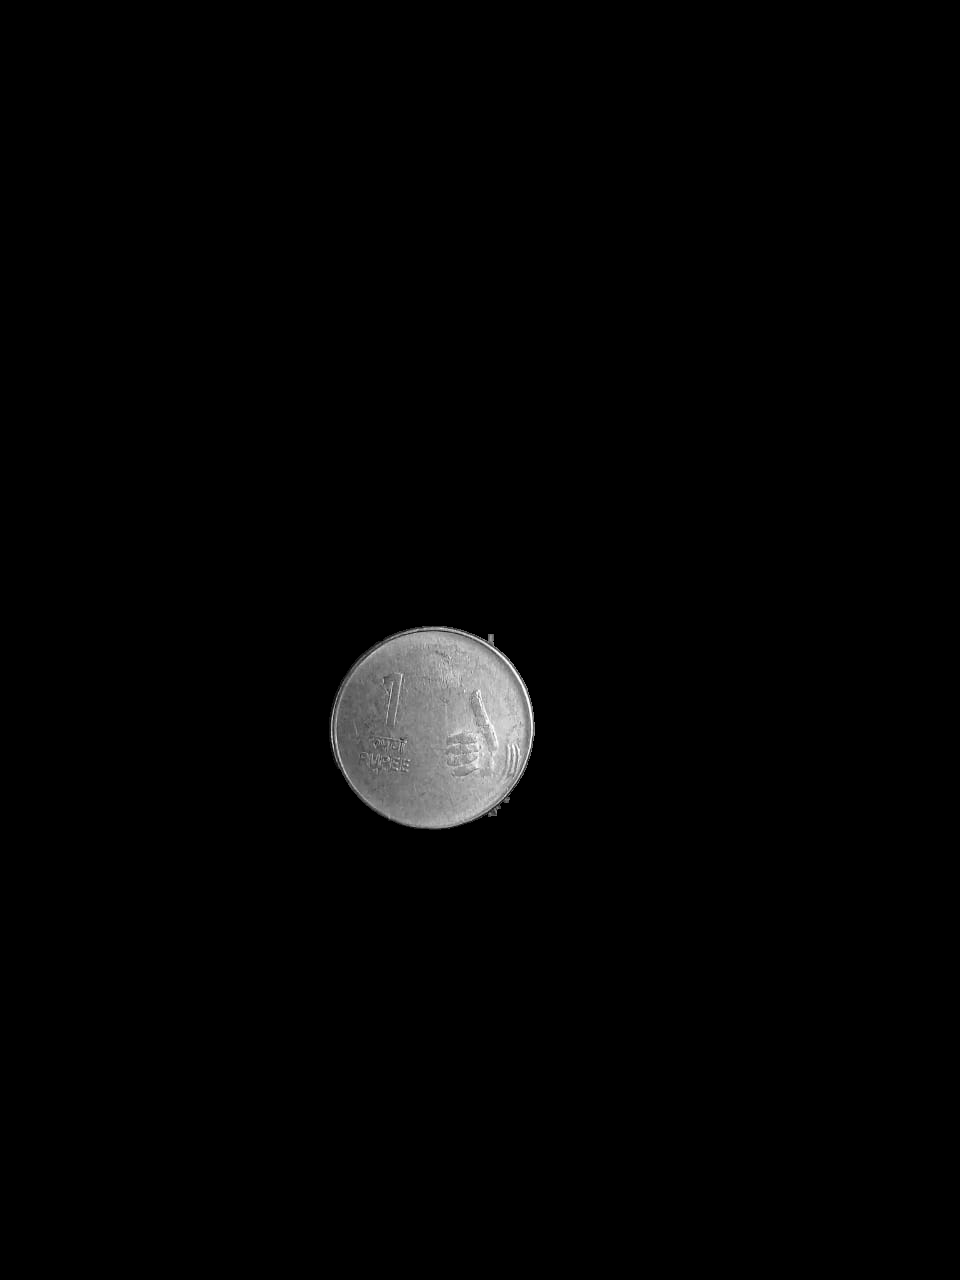

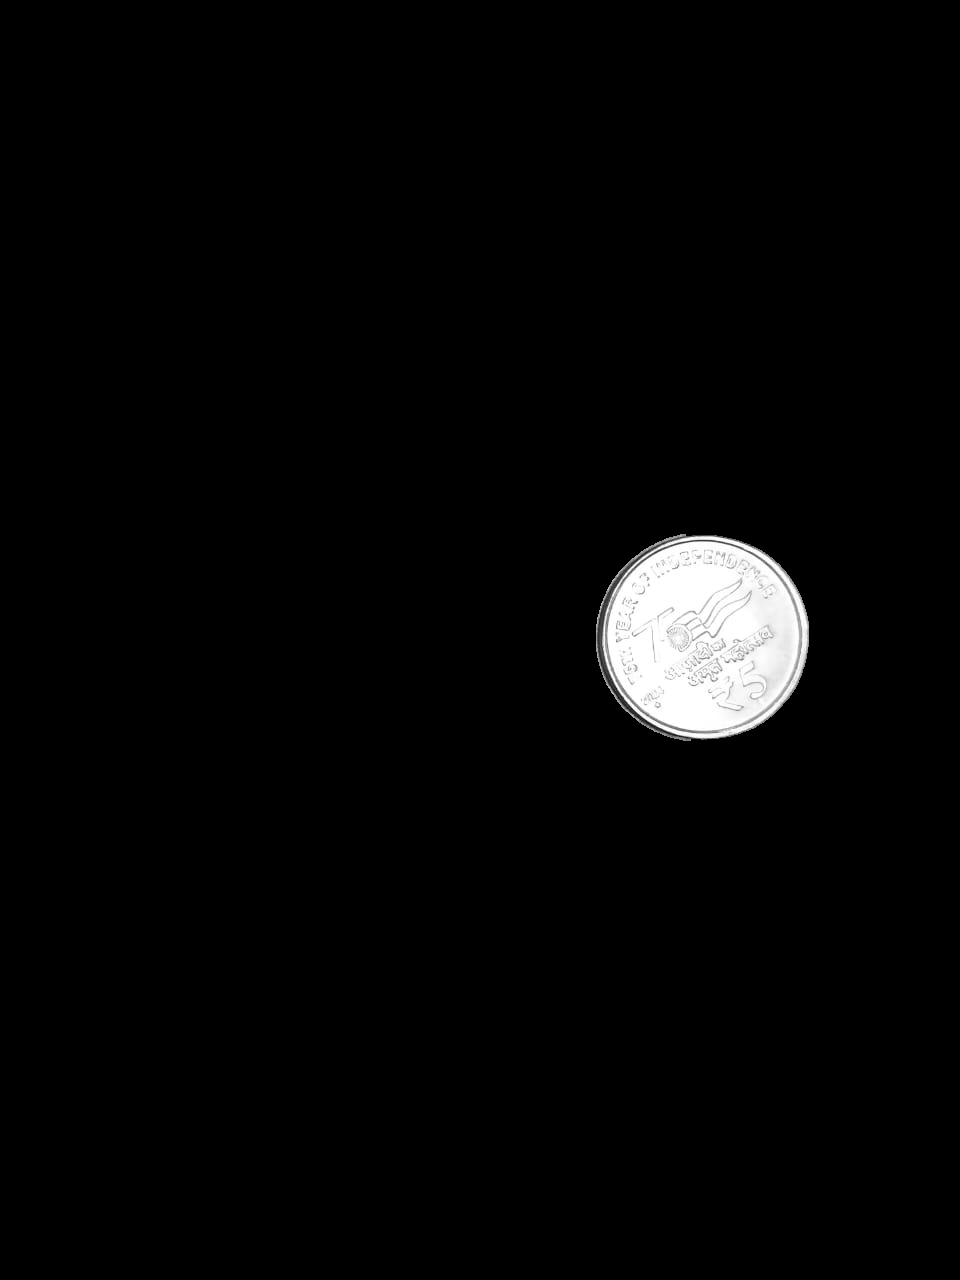

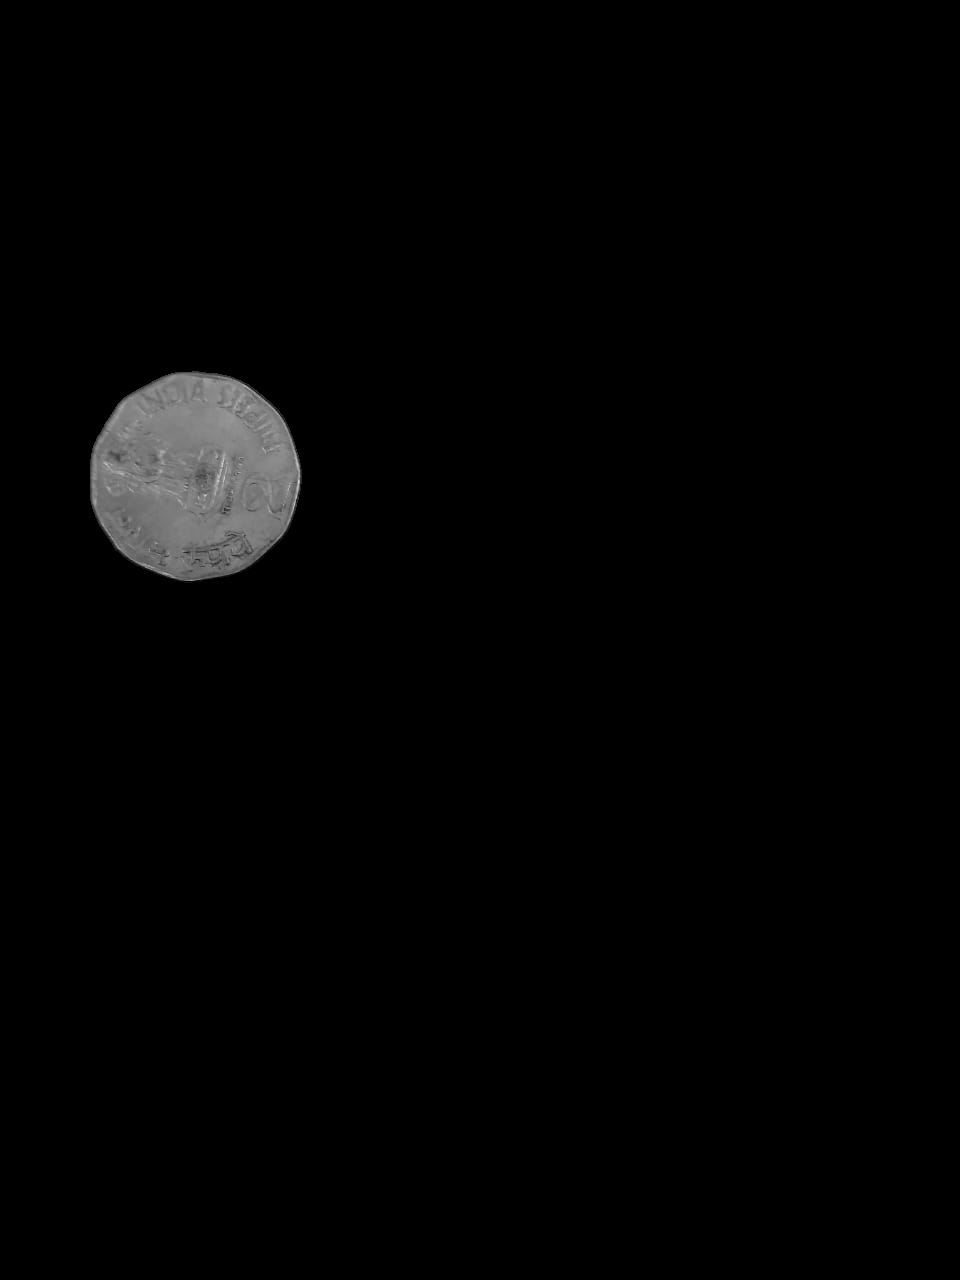

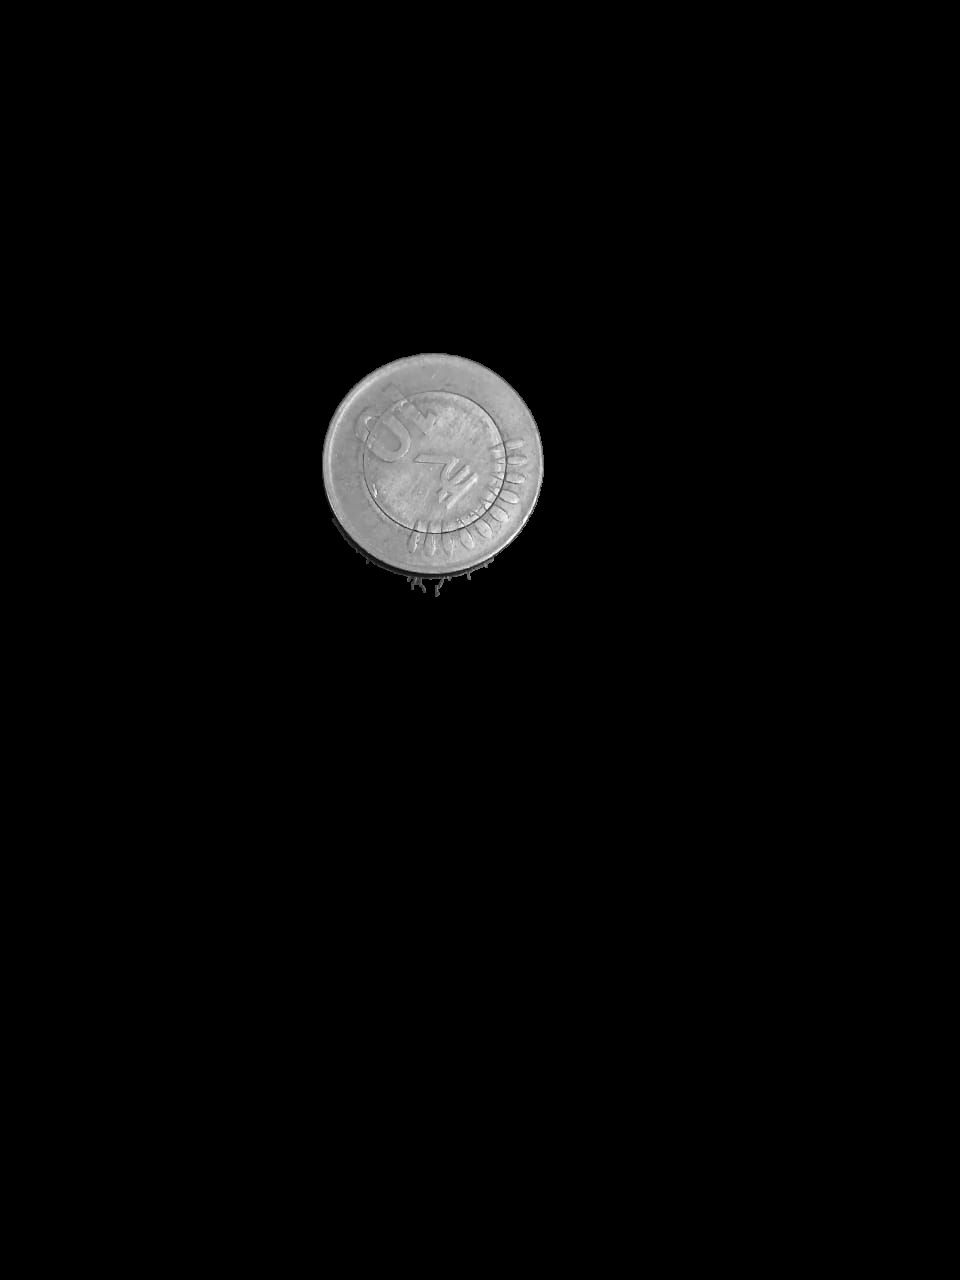

Total number of coins detected: 7


In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("coins5.jpeg", cv2.IMREAD_GRAYSCALE)  # Load the image as grayscale, makes edge detection easier
original_image = cv2.imread("coins5.jpeg")  # Load the original color image for visualization later

# a. Detect all coins in the image (Edge Detection)
# First, let's blur the image to get rid of noise, otherwise the edge detection will be messy
blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur, (5, 5) is the kernel size

# Now, we use Canny edge detection to find the edges of the coins
edges = cv2.Canny(blurred, 50, 150)  # 50 and 150 are thresholds for edge detection, need to tweak these sometimes

# Dilate the edges to close any small gaps, this is important for contour detection later
kernel = np.ones((3, 3), np.uint8)  # Create a small kernel for dilation
dilated_edges = cv2.dilate(edges, kernel, iterations=1)  # Dilate the edges once

# Find contours (outlines) of the coins
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Find the contours

# Visualize detected coins
coin_count = 0  # Initialize a counter for the coins
for contour in contours:
    area = cv2.contourArea(contour)  # Calculate the area of the contour
    if area > 1000:  # Filter out small contours, they are probably noise, 1000 is a threshold, might need to change it
        coin_count += 1  # Increment the coin count
        cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)  # Draw green outlines around the coins

cv2_imshow(original_image)  # Show the image with the detected coins
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()  # Close the image window

# b. Segmentation of Each Coin
for i, contour in enumerate(contours):  # Loop through each contour
    area = cv2.contourArea(contour)  # Calculate the area of the contour
    if area > 1000:  # Filter out small contours again
        # Create a mask for the current coin, this will be used to isolate it
        mask = np.zeros_like(image, dtype=np.uint8)  # Create a black image of the same size as the original
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)  # Draw the contour on the mask, filled with white

        # Apply the mask to isolate the coin
        segmented_coin = cv2.bitwise_and(image, image, mask=mask)  # Use bitwise AND to keep only the part of the image inside the mask

        # Convert segmented coin to BGR for display (if needed)
        segmented_coin_bgr = cv2.cvtColor(segmented_coin, cv2.COLOR_GRAY2BGR) # convert to color for display

        cv2_imshow(segmented_coin_bgr)  # Show the segmented coin
        cv2.waitKey(0)  # Wait for a key press
        cv2.destroyAllWindows()  # Close the image window

# c. Count the Total Number of Coins
print(f"Total number of coins detected: {coin_count}")  # Print the total number of coins